In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from DataFuncs import DataFuncs
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)})

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Enable interactive notebook

In [ ]:
%matplotlib notebook

# Main


Load Experiment data. 

In [2]:
DataFuncsObj = DataFuncs()
all_tag_measurements = pd.read_pickle(r'tag_measurements_2020_03_28.pkl')
all_tag_measurements = all_tag_measurements.dropna(how='any').reset_index(drop=True)

Choose obstacle to show

In [ ]:
pd.unique(all_tag_measurements.obstacle)

In [ ]:
obstacle = 'No Obstacle'

show_measurements = all_tag_measurements.where(all_tag_measurements.obstacle == obstacle)
show_measurements = show_measurements.dropna(how='any').reset_index(drop=True)

ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["rssi"], hue =show_measurements["DisplayName"] ).set_title(obstacle + " - All setups")

In [ ]:
# ax = sns.violinplot(x="distance", y="rssi", data=show_measurements)
ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["rssi"] ).set_title(obstacle + " - All setups")

In [ ]:
pd.unique(show_measurements.setup)

In [ ]:
for setup in pd.unique(show_measurements.setup):
    setup_measurements = show_measurements.where(show_measurements.setup == setup)
    title_str = str(obstacle) + " - " + str(setup)
    plt.figure()
#     color by display name
#     sns.boxplot(x=np.round(setup_measurements["distance"]*4)/4, y=setup_measurements["rssi"], hue =setup_measurements["DisplayName"]) .set_title(title_str)
#     all devices united
    sns.boxplot(x=np.round(setup_measurements["distance"]*4)/4, y=setup_measurements["rssi"]) .set_title(title_str)
    plt.show()

# Are the two devices in the same room?


In [ ]:
measurements_same_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'No Obstacle')
measurements_same_room = measurements_same_room.dropna(how='any').reset_index(drop=True)

measurements_other_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'Obstacle: wall')
measurements_other_room = measurements_other_room.dropna(how='any').reset_index(drop=True)

sns.boxplot(x=all_tag_measurements["obstacle"], y=all_tag_measurements["rssi"], hue =all_tag_measurements["DisplayName"]).set_title('All distances')

# Plot window data

In [4]:
win_size_seconds = 60

Plot move mean

In [ ]:
# all_tag_rolling = DataFuncsObj.run_rolling_func_df(all_tag_measurements, 'mean', 'DisplayName', 'rssi', win_size_seconds)
all_tag_rolling = DataFuncsObj.run_rolling_func_df_2_columns(all_tag_measurements, 'mean', 'DisplayName','distance', 'rssi', win_size_seconds)
obstacle = 'No Obstacle'
show_measurements = all_tag_rolling.where(all_tag_rolling.obstacle == obstacle)
show_measurements = show_measurements.dropna(how='any').reset_index(drop=True)

In [ ]:
plt.figure()
ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["mean_rssi"], hue =show_measurements["DisplayName"] ).set_title(obstacle + " mean - All setups")
# ax.figure.savefig("mean_rssi.png")

In [ ]:
# Plot violinplot to show distribution
plt.figure()
ax = sns.violinplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["mean_rssi"] ).set_title(obstacle + " mean rssi - All setups")
ax.figure.savefig("mean_rssi_violinplot.png")

Plot move variance

In [ ]:
# all_tag_rolling = DataFuncsObj.run_rolling_func_df(all_tag_measurements, 'var', 'DisplayName', 'rssi', win_size_seconds)
all_tag_rolling = DataFuncsObj.run_rolling_func_df_2_columns(all_tag_measurements, 'var', 'DisplayName','distance' ,'rssi', win_size_seconds)

obstacle = 'No Obstacle'
show_measurements = all_tag_rolling.where(all_tag_rolling.obstacle == obstacle)
show_measurements = show_measurements.dropna(how='any').reset_index(drop=True)   

In [ ]:
plt.figure()
ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["var_rssi"], hue =show_measurements["DisplayName"] ).set_title(obstacle + " var - All setups")
# ax.figure.savefig("var_rssi.png")

Plot counts

In [ ]:
# all_tag_rolling = DataFuncsObj.run_rolling_func_df(all_tag_measurements, 'count', 'DisplayName', 'rssi', win_size_seconds)
all_tag_rolling = DataFuncsObj.run_rolling_func_df_2_columns(all_tag_measurements, 'count', 'DisplayName','distance' ,'rssi', win_size_seconds)
obstacle = 'No Obstacle'
show_measurements = all_tag_rolling.where(all_tag_rolling.obstacle == obstacle)
show_measurements = show_measurements.dropna(how='any').reset_index(drop=True)   

In [ ]:
plt.figure()
ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["count_rssi"], hue =show_measurements["DisplayName"] ).set_title(obstacle + " counts - All setups")
# ax.figure.savefig("count_rssi.png")

In [ ]:
# plot violinplot to show semi distribution
plt.figure()
ax = sns.violinplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["count_rssi"] ).set_title(obstacle + " counts - All setups")
ax.figure.savefig("count_rssi_violinplot.png")

Plot wanted percentile 

In [5]:
wanted_percentile = 90
DataFuncsObj.set_percent(wanted_percentile)

all_tag_rolling = DataFuncsObj.run_rolling_func_df_2_columns(all_tag_measurements, 'percentile', 'DisplayName','distance' ,'rssi', win_size_seconds)
obstacle = 'No Obstacle'
show_measurements = all_tag_rolling.where(all_tag_rolling.obstacle == obstacle)
show_measurements = show_measurements.dropna(how='any').reset_index(drop=True)   

In [ ]:
plt.figure()
ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["percentile_rssi"], hue =show_measurements["DisplayName"] ).set_title(obstacle + " percentile - All setups")
# ax.figure.savefig("percentile_80_rssi.png")

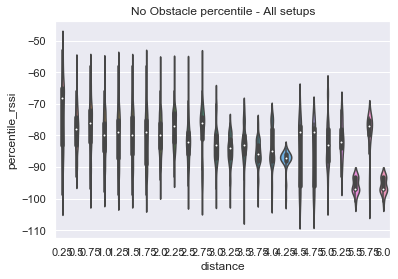

In [6]:
# plot violinplot to show semi distribution
plt.figure()
ax = sns.violinplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["percentile_rssi"] ).set_title(obstacle + " percentile - All setups")
# ax.figure.savefig("percentile_90_rssi_violinplot.png")